<a href="https://colab.research.google.com/github/jchhapekar/solar_generator_roi/blob/main/solar_power_return_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calculates the percentage returns for different consumptions given capacity of**
**Solar power plant installed on rofftop in "Net Metering" Configuration**


In [1]:
# Following are the parameters of the program. Tweak these values as per your requirements
MONTHLY_UNITS_PRODUCED = 400 # Number of units produced by solar plant per month
COST_OF_PLANT = 350000 # The cost of plant in Rs which produce above average monthly units

PER_UNIT_EXPORT_PRICE = 4.02 # Export price promised by BESCOM for every unit exported from the house

# Different slabs and rates for BESCOM. Code each slab as below:
# [starting units, ending units, price per unit for the slab]

slabs = [[1, 50, 4.15],
         [51, 100, 5.60],
         [101, 200, 7.15],
         [201, 100000, 8.20]] # It is first number & above

TAX_PERCENTAGE = 0.09 # Tax on above charges

FIXED_CHARGES = 1090.00 # 1090 Rs as of now for 10KW Sanctioned Load

In [2]:
#Calculate energy charges based on number of units consumed

def calculate_energy_charges(units):
  remaining_units = units
  charges = 0.0
  for slab in slabs:
    units_in_slab = slab[1] - slab[0] + 1
    if remaining_units < units_in_slab:
      units = remaining_units
    else:
      units = units_in_slab
    charges = charges + units * slab[2]
    remaining_units = remaining_units - units_in_slab
    if remaining_units <= 0:
      break
  #print("Charges without Tax:", charges)
  return charges * (1 + TAX_PERCENTAGE)


In [3]:
calculate_energy_charges(100)

531.375

In [4]:
def compute_electricity_bill(units):
  return calculate_energy_charges(units) + FIXED_CHARGES

In [5]:
compute_electricity_bill(0)

1090.0

In [6]:
# Negative value here would indicates payment from BESCOM to consumer.
# Positive values indicate amount payable by individual
def compute_net_electricity_bill(units_produced, units_consumed):
  units_for_billing = 0
  payable_by_bescom = 0.0
  payable_by_consumer = 0.0
  net_units_exported = 0
  if units_produced > units_consumed:
    net_units_exported = units_produced - units_consumed
    units_for_billing = 0 # Keeping this line only for readability
  elif units_produced <= units_consumed:
    units_for_billing = units_consumed - units_produced
    net_units_exported = 0 # Keeping this line only for readability
  payable_by_bescom = net_units_exported * PER_UNIT_EXPORT_PRICE
  payable_by_consumer = compute_electricity_bill(units_for_billing)
  return payable_by_consumer - payable_by_bescom

In [7]:
compute_net_electricity_bill(400, 0)

-517.9999999999998

In [8]:
# Compute percentage ROI in terms of per anum returns on given capital expenditure
# and per month production vs consumption
def compute_percentage_roi(units_produced, units_consumed, capital_cost):
  bill_wo_solar = compute_electricity_bill(units_consumed)
  bill_with_solar = compute_net_electricity_bill(units_produced, units_consumed)
  net_gain_due_to_solar = bill_wo_solar - bill_with_solar
  return ((net_gain_due_to_solar * 12)/capital_cost)*100


In [9]:
compute_percentage_roi(400, 400, 350000)

10.622828571428574

In [10]:
compute_percentage_roi(400, 200, 350000)

7.250485714285714

In [11]:
compute_percentage_roi(400, 500, 350000)

11.865428571428572

In [12]:
roi_table_400_units_production = []
for consumed in range(0, 1001):
  roi = compute_percentage_roi(MONTHLY_UNITS_PRODUCED, consumed, COST_OF_PLANT)
  roi_table_400_units_production.append(roi)

In [13]:
import matplotlib.pyplot as plt

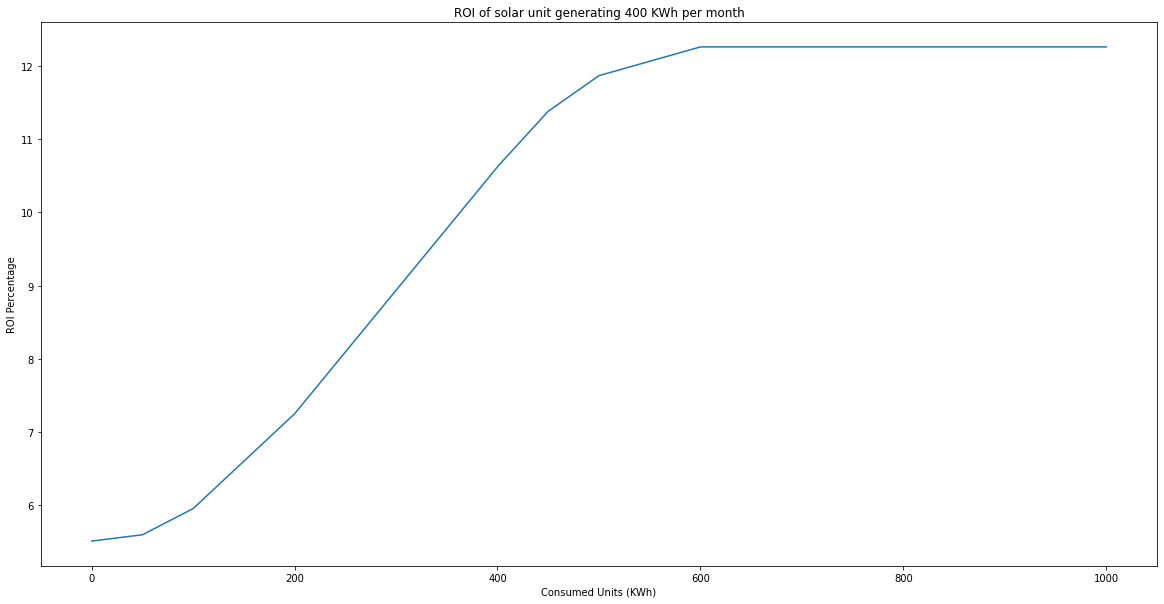

In [14]:
plt.figure(figsize=(20, 10))
plt.xlabel("Consumed Units (KWh)")
plt.ylabel("ROI Percentage")
plt.title("ROI of solar unit generating 400 KWh per month")
plt.plot(roi_table_400_units_production)

In [15]:
monthly_consumption = 800 # In KWh

def plant_cost_for_given_production(production):
  cost_to_produce_per_unit_solar = 350000.00/400
  if production == 0:
    return 1
  return production * cost_to_produce_per_unit_solar

roi_table_sweep_across_production = []
for produced in range(0, monthly_consumption * 3):
  plant_cost = plant_cost_for_given_production(produced)
  roi = compute_percentage_roi(produced, monthly_consumption, plant_cost)
  roi_table_sweep_across_production.append(roi)

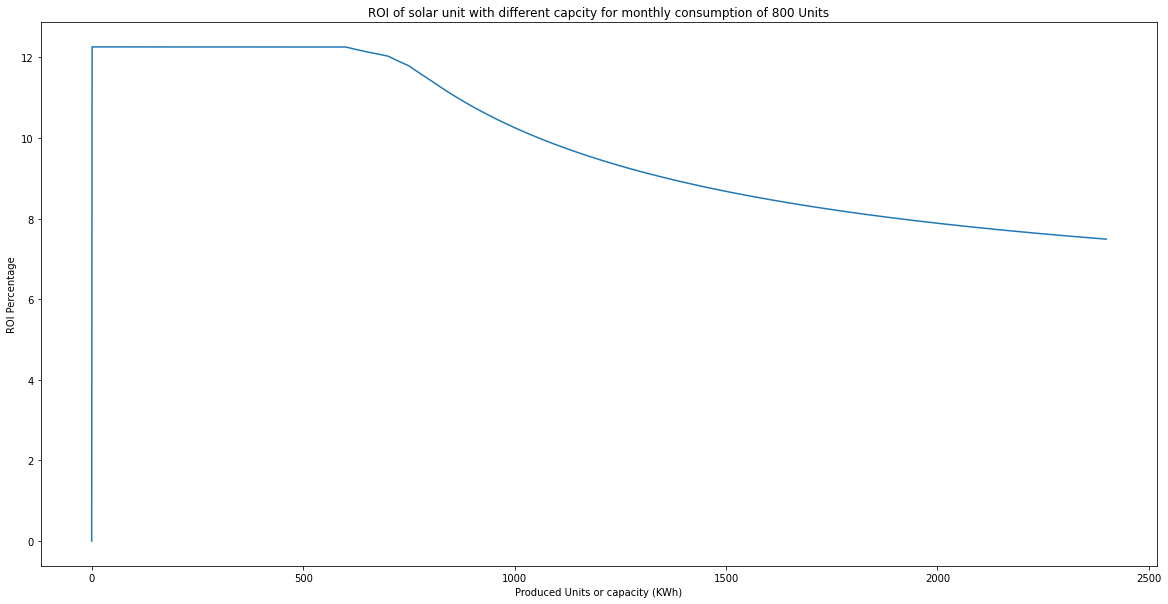

In [16]:
plt.figure(figsize=(20, 10))
plt.xlabel("Produced Units or capacity (KWh)")
plt.ylabel("ROI Percentage")
plt.title("ROI of solar unit with different capcity for monthly consumption of 800 Units")
plt.plot(roi_table_sweep_across_production)